In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

## Plot Histogram of Occurrences for Train, Val and Test

In [2]:
train_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/Base datasets/train_df_ne_type.parquet")

In [3]:
val_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/Base datasets/val_df_ne_type.parquet")

In [4]:
test_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/Base datasets/test_df_ne_type.parquet")

In [11]:
def plot_occurrences(df, filename):
    """Creates a bar plot of the occurrences of each slogan in the DataFrame."""

    occurrences = df.sum(axis=0)
    occurrences = occurrences.sort_values(
        ascending=True
    )  # Ordina in modo ascendente per il grafico a barre orizzontali

    
    occurrences = occurrences[-40:]

    plt.figure(figsize=(10,11))  # Aumenta le dimensioni del grafico

    plt.barh(
        occurrences.index, occurrences.values
    )  # Crea un grafico a barre orizzontali
    plt.ylabel("Slogan")
    plt.xlabel("Occorrenze")
    plt.title("Occorrenze di Slogan nel Dataset")

    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()  
    plt.savefig(filename)
    plt.close()

In [12]:
plot_occurrences(train_df, "train_occurrences.png")
plot_occurrences(val_df, "val_occurrences.png")
plot_occurrences(test_df, "test_occurrences.png")

## Find Slogans with zero occurrences in Train, Val and Test

In [6]:
print("Occurrences in Train\n")
occurrences_train = train_df.sum(axis=0)
occurrences_train = occurrences_train[occurrences_train == 0].sort_values(
    ascending=True
)
print(occurrences_train)
print("-----------------------------------------------------------")
print("Occurrences in Test\n")
occurrences_test = test_df.sum(axis=0)
occurrences_test = occurrences_test[occurrences_test == 0].sort_values(ascending=True)
print(occurrences_test)
print("-----------------------------------------------------------")
print("Occurrences in Validation\n")
occurrences_val = val_df.sum(axis=0)
occurrences_val = occurrences_val[occurrences_val == 0].sort_values(ascending=True)
print(occurrences_val)

Occurrences in Train

Series([], dtype: int64)
-----------------------------------------------------------
Occurrences in Test

guasto bus di comunicazione                           0
cardinitcard initializing                             0
vc unequipped ho vc unequipped                        0
serversignalfailure odu ssf                           0
unidentified specific problem non inviato da agent    0
crdpwroff card power off xexc xexc                    0
dtype: int64
-----------------------------------------------------------
Occurrences in Validation

None                                                  0
guasto bus di comunicazione                           0
cardinitcard initializing                             0
vc unequipped ho vc unequipped                        0
serversignalfailure odu ssf                           0
unidentified specific problem non inviato da agent    0
crdpwroff card power off xexc xexc                    0
dtype: int64


## Prints slogans with f1 > 0

In [49]:
occurrences = test_df.sum(axis=0)
occurrences_df = occurrences.to_frame("occurrences")
occurrences_df = occurrences_df.sort_values(by="occurrences", ascending=False)
occurrences_df = occurrences_df.reset_index()
occurrences_df = occurrences_df.rename(columns={"index": "slogan"})

In [50]:
occurrences_df

,slogan,occurrences
0,fermo parziale gsm,19705
1,apparato isolato,19441
2,cell logical channel availability supervision,18629
3,fermo totale gsm,18074
4,signal degraded,16946
...,...,...
108,cardinitcard initializing,0
109,vc unequipped ho vc unequipped,0
110,serversignalfailure odu ssf,0
111,unidentified specific problem non inviato da a...,0


In [51]:
df = pd.read_csv("f1.csv")

In [52]:
merge_df = pd.merge(occurrences_df, df, on="slogan", how="left")

In [53]:
merge_df

,slogan,occurrences,f1
0,fermo parziale gsm,19705,0.980283
1,apparato isolato,19441,0.925658
2,cell logical channel availability supervision,18629,0.952073
3,fermo totale gsm,18074,0.978681
4,signal degraded,16946,0.936193
...,...,...,...
108,cardinitcard initializing,0,0.000000
109,vc unequipped ho vc unequipped,0,0.000000
110,serversignalfailure odu ssf,0,0.000000
111,unidentified specific problem non inviato da a...,0,0.000000


In [54]:
merge_df.to_csv("merge_df.csv", index=False)

In [55]:
f1_score = pd.read_csv("f1.csv")

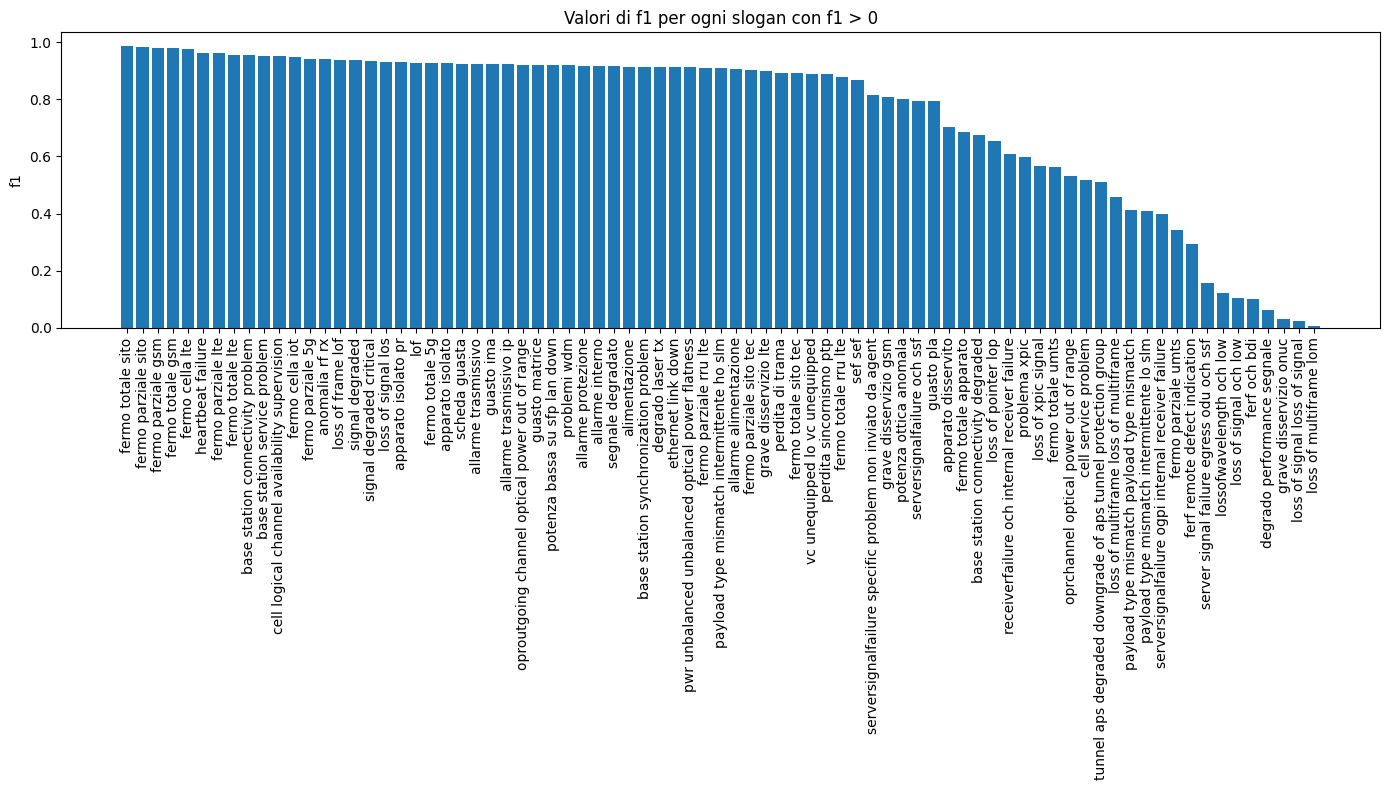

In [57]:


# Supponendo che f1_score sia un DataFrame con colonne 'slogan' e 'f1'
f1_score = f1_score.fillna("None").sort_values(by="f1", ascending=False)

# Supponiamo che il valore sia 0.5
value = 0

f1_score_filtered = f1_score.loc[f1_score['f1'] > value]

# Ora puoi plottare il DataFrame filtrato
plt.figure(figsize=(14, 8))  # Imposta le dimensioni del grafico
plt.bar(f1_score_filtered['slogan'], f1_score_filtered['f1'])  # Crea un grafico a barre
plt.ylabel('f1')  # Imposta l'etichetta dell'asse y
plt.title('Valori di f1 per ogni slogan con f1 > {}'.format(value))  # Imposta il titolo del grafico
plt.xticks(rotation=90)  # Ruota le etichette dell'asse x di 90 gradi per una migliore leggibilità
plt.tight_layout()  # Assicura che tutto sia visibile quando si salva l'immagine
plt.show()  # Mostra il grafico

## Print slogans and f1 for slogan with number of occurrences > n

In [39]:
merge_df = pd.read_csv("merge_df.csv")

In [40]:
merge_df.fillna("None", inplace=True)

C:\Users\Nicolò Caradonna\AppData\Local\Temp\ipykernel_8564\3840952376.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merge_df.fillna("None", inplace=True)


In [41]:
merge_df

,slogan,occurrences,f1
0,fermo parziale gsm,19705,0.836749
1,apparato isolato,19441,0.735899
2,cell logical channel availability supervision,18629,0.727493
3,fermo totale gsm,18074,0.83504
4,signal degraded,16946,0.721255
...,...,...,...
108,cardinitcard initializing,0,0.0
109,vc unequipped ho vc unequipped,0,0.0
110,serversignalfailure odu ssf,0,0.0
111,unidentified specific problem non inviato da a...,0,0.0


In [61]:

filtered_df = merge_df[merge_df['occurrences'] > 200]

In [59]:
filtered_df

,slogan,occurrences,f1
0,fermo parziale gsm,19705,0.980283
1,apparato isolato,19441,0.925658
2,cell logical channel availability supervision,18629,0.952073
3,fermo totale gsm,18074,0.978681
4,signal degraded,16946,0.936193
5,base station connectivity problem,16774,0.955441
6,fermo totale lte,16576,0.955678
7,loss of signal los,11923,0.931266
8,base station connectivity degraded,10561,0.675109
9,fermo parziale lte,9635,0.960874


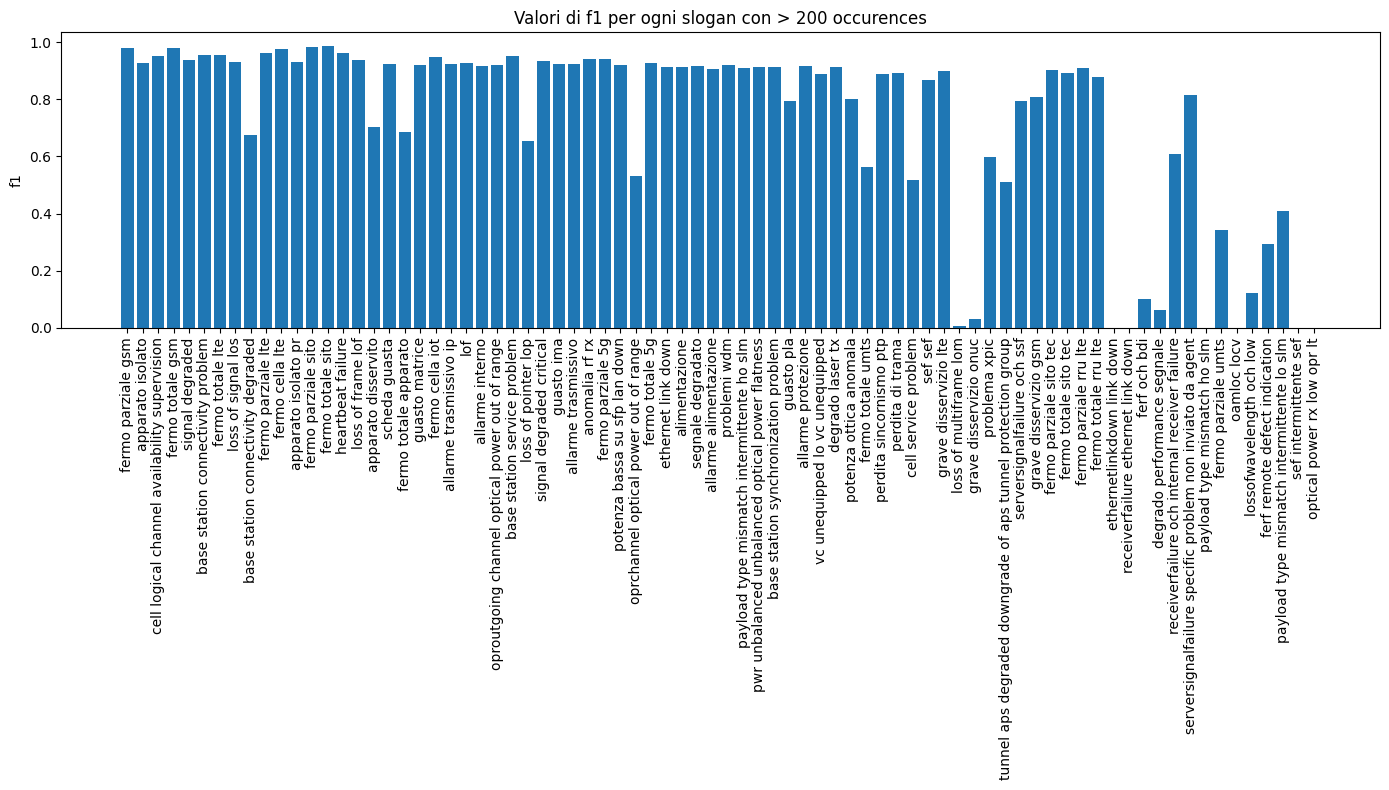

In [62]:
# Ora puoi plottare il DataFrame filtrato
plt.figure(figsize=(14, 8))  # Imposta le dimensioni del grafico
plt.bar(filtered_df['slogan'], filtered_df['f1'])  # Crea un grafico a barre
plt.ylabel('f1')  # Imposta l'etichetta dell'asse y
plt.title('Valori di f1 per ogni slogan con > 200 occurences'.format(value))  # Imposta il titolo del grafico
plt.xticks(rotation=90)  # Ruota le etichette dell'asse x di 90 gradi per una migliore leggibilità
plt.tight_layout()  # Assicura che tutto sia visibile quando si salva l'immagine
plt.show() 